# Data Challenge
### by TOTVS LABS

#### Wesley Rodrigues da Silva

The challenge's objective is to write a code to:

1. Get the records from a datafile containing transactions from a restaurant.
2. Study the data to find patterns on fields that can help to predict how much a customer will spend.
3. Calculate a sales forecast for the next week.


**The objectives must be achieved in less than 5 work hours.**


TOTVS wants some skills from the developer trying to solve the challenge:

1. Ability to read/parse a dataset from a file.
2. Understanding of common business data.
3. Basic knowledge of artificial intelligence.
4. Ability to build a model to identify correlations and patterns between fields.
5. Code design
6. Ability to write clear documentation
7. BONUS: Ability to build a forecast model.

## 1. Importing the Data

The provided link (https://github.com/TOTVS/MDMStatic/blob/master/code-challenge/TOTVS%20Labs%20-%20AI%20Challenge%20-%20Dataset.zip?raw=true) results in a zip file containing a file named `sample.txt`.


The first step is to check the file content. I am using Linux, so I typed on my terminal:


```
[wesley@linuxdragon: ~/Downloads/TOTVS]$ file sample.txt 
sample.txt: ASCII text
[wesley@linuxdragon: ~/Downloads/TOTVS]$ wc -l sample.txt 
120015 sample.txt
[wesley@linuxdragon: ~/Downloads/TOTVS]$ head -n 15 sample.txt 
[
{
  "complemento": {
    "valorTotal": 24.9
  },
  "dets": [
    {
      "nItem": "1",
      "prod": {
        "indTot": "1",
        "qCom": 1.0,
        "uCom": "UN",
        "vProd": 3.5,
        "vUnCom": 3.5,
        "xProd": "AGUA"
[wesley@linuxdragon: ~/Downloads/TOTVS]$ tail -n 15 sample.txt 
      "vcofins": 0.0,
      "vicms": 0.0,
      "vicmsDeson": 0.0,
      "vii": 0.0,
      "vipi": 0.0,
      "vnf": 32.8,
      "vpis": 0.0,
      "vst": 0.0
    }
  },
  "versaoDocumento": {
    "$numberLong": "1"
  }
}
]
```


The first and last chars ([]) are common to lists/arrays.
The data disposed like dictionaries are common to JSON files.
This file seems to be an array of JSON records, which is a valid JSON dump, very common when exporting data from modern systems and APIs.

There is a Python lib named `json`, which can be used to read and parse the JSON file:

In [1]:
import json

Now we can read the JSON file to a Python variable and check if it is properly loaded with a simple Unit Test:

In [2]:
data = json.load(open("sample.txt"))
assert type(data[0]) == dict, "The type of data[0] must be a dict."
data[0]

{'complemento': {'valorTotal': 24.9},
 'dets': [{'nItem': '1',
   'prod': {'indTot': '1',
    'qCom': 1.0,
    'uCom': 'UN',
    'vProd': 3.5,
    'vUnCom': 3.5,
    'xProd': 'AGUA'}},
  {'nItem': '2',
   'prod': {'indTot': '1',
    'qCom': 0.312,
    'uCom': 'KG',
    'vProd': 21.4,
    'vUnCom': 68.6,
    'xProd': 'BUFFET'}}],
 'emit': {'cnpj': '01.234.567/0001-89',
  'enderEmit': {'fone': '1-650-933-4902',
   'uf': 'CA',
   'xBairro': '',
   'xLgr': '650 Castro St. unit 210',
   'xMun': 'Mountain View',
   'xPais': 'United States'},
  'xFant': 'TOTVS Labs'},
 'ide': {'dhEmi': {'$date': '2016-01-05T12:01:54.000Z'}, 'natOp': 'VENDA'},
 'infAdic': {'infCpl': 'Mesa 2'},
 'total': {'icmsTot': {'vDesc': 0.0,
   'vFrete': 0.0,
   'vOutro': 0.0,
   'vProd': 24.9,
   'vSeg': 0.0,
   'vTotTrib': 2.53,
   'vbc': 0.0,
   'vbcst': 0.0,
   'vcofins': 0.0,
   'vicms': 0.0,
   'vicmsDeson': 0.0,
   'vii': 0.0,
   'vipi': 0.0,
   'vnf': 24.9,
   'vpis': 0.0,
   'vst': 0.0}},
 'versaoDocumento': 1.0}

The file seems to be properly loaded.

It is a JSON file with many levels of information, which makes harder to get the fields.

There are important fields, like dates, names, prices and products.

Let's extract the most relevant fields to variables and create a new field based on the `$date` field:

In [3]:
import pandas as pd
from datetime import datetime

selected_fields = []
for record in data:
    new_record = {}
    new_record['Total_Paid'] = record['complemento']['valorTotal']
    record_date = pd.datetime.strptime(record['ide']['dhEmi']['$date'], '%Y-%m-%dT%H:%M:%S.000Z')
    new_record['Date'] = record_date
    selected_fields.append(new_record)

Now we have a variable named 'selected_fields' containing ONE TRANSACTION PER RECORD.
Let's check if the fields are properly created with more Unit Tests and look up the first 5 records:

In [4]:
for key in ['Total_Paid', 'Date']:
    assert key in selected_fields[0].keys(), "The key must be properly imported."
selected_fields[:5]

[{'Date': datetime.datetime(2016, 1, 5, 12, 1, 54), 'Total_Paid': 24.9},
 {'Date': datetime.datetime(2016, 1, 5, 12, 3, 52), 'Total_Paid': 92.53},
 {'Date': datetime.datetime(2016, 1, 5, 12, 16, 40), 'Total_Paid': 57.86},
 {'Date': datetime.datetime(2016, 1, 5, 12, 17, 50), 'Total_Paid': 34.97},
 {'Date': datetime.datetime(2016, 1, 5, 12, 18, 35), 'Total_Paid': 46.23}]

It is hard to work with dictoraries, so we are going to import the data using a Pandas Dataframe.

Pandas Dataframe is a more powerful tool to deal with structured data.

To create the Dataframe we are using the dictionary with our selected and created fields.

Then, we run a Unit Test to ensure the data is imported properly.

Finally, we look up the first lines:

In [5]:
df = pd.DataFrame.from_records(selected_fields)
assert df['Total_Paid'][0] == 24.9, "The first record must be $24.9."
df.head()

,Date,Total_Paid
0,2016-01-05 12:01:54,24.90
1,2016-01-05 12:03:52,92.53
2,2016-01-05 12:16:40,57.86
3,2016-01-05 12:17:50,34.97
4,2016-01-05 12:18:35,46.23



**<< OBJECTIVE 1 DONE: Get the records from a datafile containing transactions from a restaurant. >>**


## 2. Getting Knowledge from Data


Our target variable is **Total_Paid**, which means how much money the client spent on the restaurant.

Now we are going to use some Python tools to find out patterns and behaviors. 


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### Total_Paid Behavior

Here we can look for sazonalities and strange behaviors, like outliers.

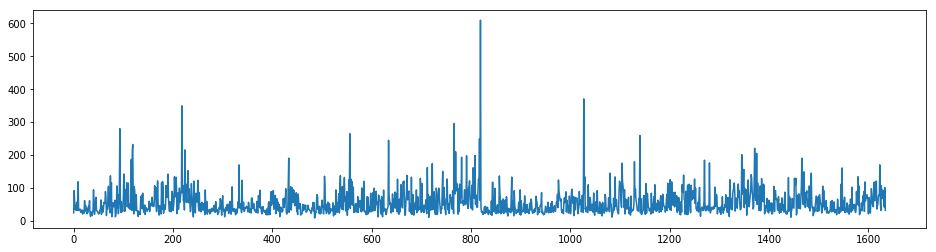

In [7]:
plt.figure(figsize=[16,4])
df['Total_Paid'].plot()

### Sales per weekday

Here is possible to understand the values sold during the week.

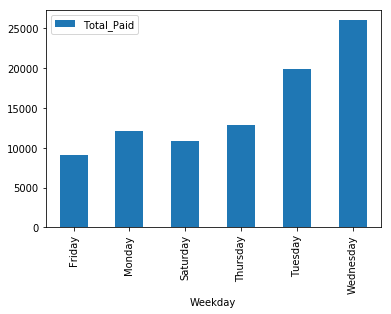

In [8]:
df_copy = df.copy()
df_copy['Weekday'] = df_copy['Date'].dt.weekday_name
df_copy.groupby('Weekday').sum().plot(kind='bar')

### Autocorrelation

Timeseries can use Autocorrelation to explain its behavior and try to predict data.
This graph shows the Autocorrelation for sales:

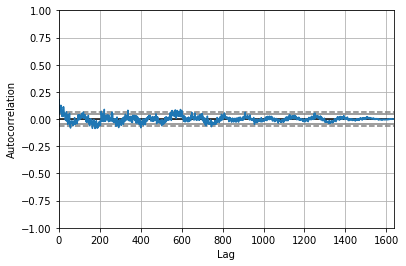

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Total_Paid'])

Now we know a little more about the customer behavior.


**<< OBJECTIVE 2 DONE: Study the data to find patterns on fields that can help to predict how much a customer will spend. >>**


## 3. Creating the Prediction Model

There are lots of good techniques to predict time series. We could use **Tensorflow and/or Keras** to create a **LSTM network** to predict the future values. Another good option would be to use **Statsmodel and ARIMA** to generate good forecasts. I've decided to use a new library created by the Facebook guys named **Prophet**. It is very easy to use, powerful and looks like sklearn, which I know how to use very well.

In [10]:
from fbprophet import Prophet

In [11]:
my_model = Prophet(yearly_seasonality=False)
df = df.set_index('Date').groupby(pd.Grouper(freq='D')).sum()
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Total_Paid': 'y'})
my_model.fit(df_prophet)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 14.0.
/home/wesley/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Our model is trained. Let's test it and generate some forecasts.

Prophet has a nice feature to generate dataframes with future data.

In [12]:
new_dataset = my_model.make_future_dataframe(periods=7, freq='D', include_history=True)
new_week = new_dataset.tail(7)
new_week

,ds
19,2016-01-24
20,2016-01-25
21,2016-01-26
22,2016-01-27
23,2016-01-28
24,2016-01-29
25,2016-01-30


In [13]:
predictions = my_model.predict(new_dataset)['yhat']

The following graphic shows the prediction based on Prophet's model.

There are a blue area showing the actual data and the orange line is the forecast.

The area without a blue fill is the forecast week.

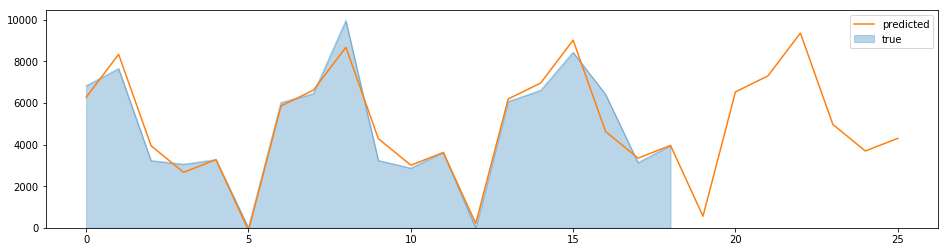

In [14]:
plt.figure(figsize=[16,4])
df_prophet['y'].plot(label="true", kind="area", alpha=0.3)
predictions.plot(label="predicted")

plt.legend()

These are the forecasted values for the new week:

In [15]:
pd.DataFrame(predictions).tail(7)

,yhat
19,555.140437
20,6532.447993
21,7298.618842
22,9358.756468
23,4967.902584
24,3690.802283
25,4299.644615


**<< OBJECTIVE 3 DONE: Calculate a sales forecast for the next week. >>**

**Objectives**

1. ~~Get the records from a datafile containing transactions from a restaurant.~~
2. ~~Study the data to find patterns on filds that can help to predict how much a customer will spend.~~
3. ~~Calculate a sales forecast for the next week.~~


**Evaluation criteria**

1. ~~Ability to read/parse a dataset from a file.~~
2. ~~Understanding of common business data.~~
3. ~~Basic knowledge of artificial intelligence.~~
4. ~~Ability to build a model to identify correlations and patterns between fields.~~
5. ~~Code design~~
6. ~~Ability to write clear documentation~~
7. ~~BONUS: Ability to build a forecast model.~~

## Final Considerations

I've enjoyed a lot doing this exercise. With more time I would create a baseline model and some measurement method and then start to test different aproaches like Neural Nets, other regression libraries and algorithms.

See you :D